<a href="https://colab.research.google.com/github/MphoPetunia/SpecsSurveyData/blob/main/companyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Cleaning and Exploration***

Loading to and exploring the dataset to manipulate and analyze the data easily.

In [21]:
import pandas as pd
import numpy as np
data =pd.read_csv("Dots Customer Survey.csv")
data.head()




,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


Step 2: Initial Data Exploration

In [22]:
# Checking the structure of the dataset
print("Dataset Info:")
data.info()

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Basic statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Checking for unique values in each column (useful for categorical variables)
print("\nUnique Values in Each Column:")
print(data.nunique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working

## Handling  Missing and Checking for Anomalies

In [23]:
# Checking for missing values (explicit and hidden)
print("Missing values (explicit):")
print(data.isnull().sum())

# Check for hidden missing values like blanks or unusual placeholders
print("\nHidden Missing Values:")
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")


Missing values (explicit):
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)   

## Identifying outliers in Key Numerical Columns

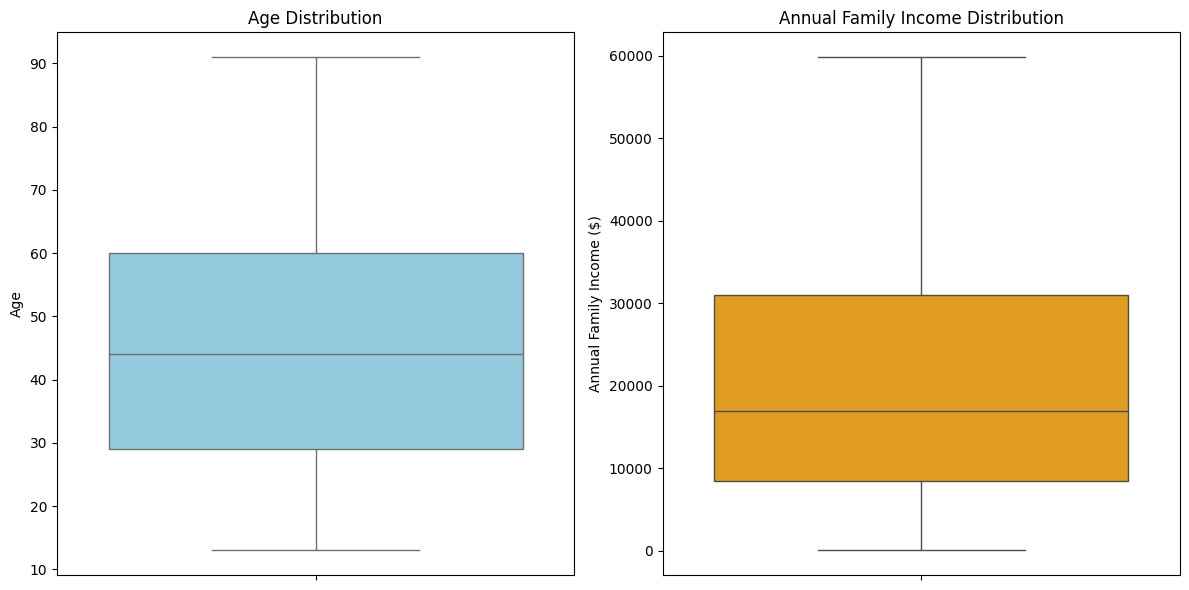

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions for Age and Income
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Age Distribution
sns.boxplot(data['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Annual Family Income Distribution
sns.boxplot(data['Annual Family Income ($)'], ax=axes[1], color='orange')
axes[1].set_title('Annual Family Income Distribution')

plt.tight_layout()
plt.show()


# Exploration Data Analysis

Next, to uncover insights about the data and it's relationship with the target variable(Wear Specs)

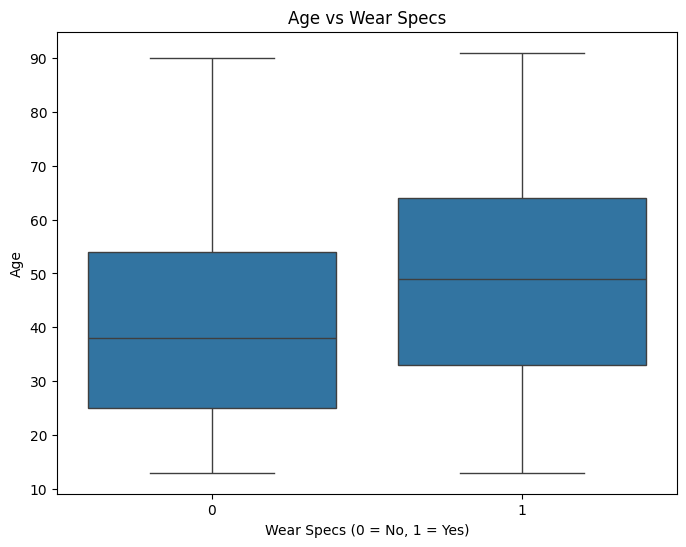

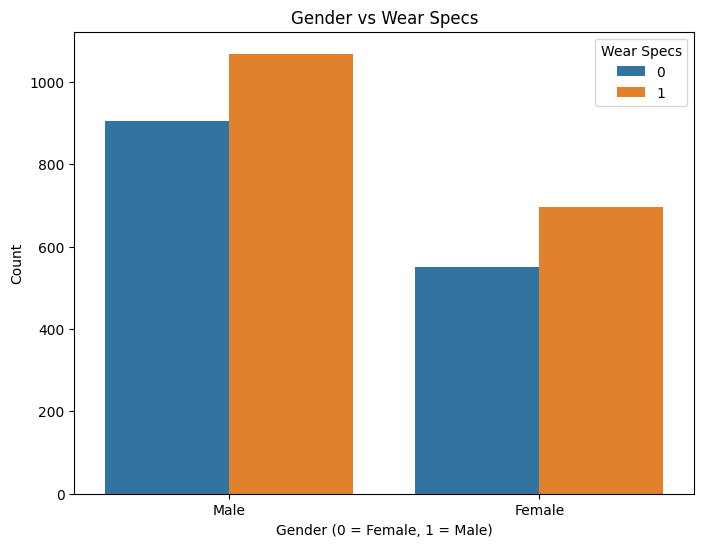

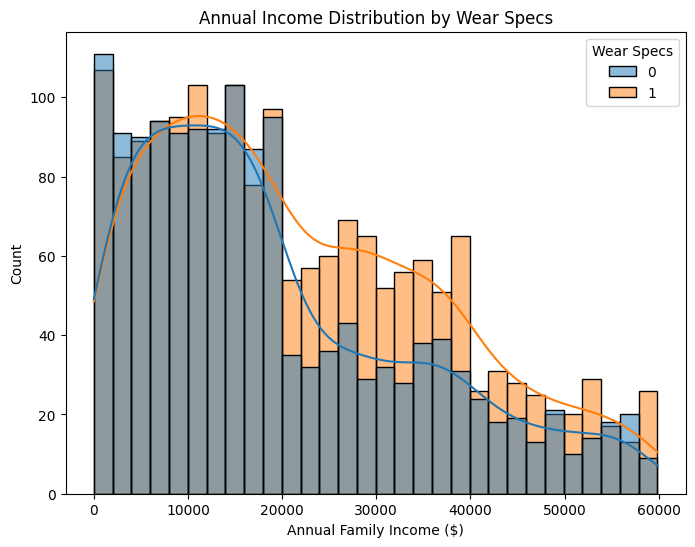

In [25]:
# Boxplot: Age vs Wear Specs
plt.figure(figsize=(8, 6))
sns.boxplot(x='Wear Specs', y='Age', data=data)
plt.title("Age vs Wear Specs")
plt.xlabel("Wear Specs (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Barplot: Gender vs Wear Specs
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Wear Specs', data=data)
plt.title("Gender vs Wear Specs")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Wear Specs", loc='upper right')
plt.show()

# Distribution of Annual Income by Wear Specs
plt.figure(figsize=(8, 6))
sns.histplot(data, x='Annual Family Income ($)', hue='Wear Specs', kde=True, bins=30)
plt.title("Annual Income Distribution by Wear Specs")
plt.xlabel("Annual Family Income ($)")
plt.ylabel("Count")
plt.show()


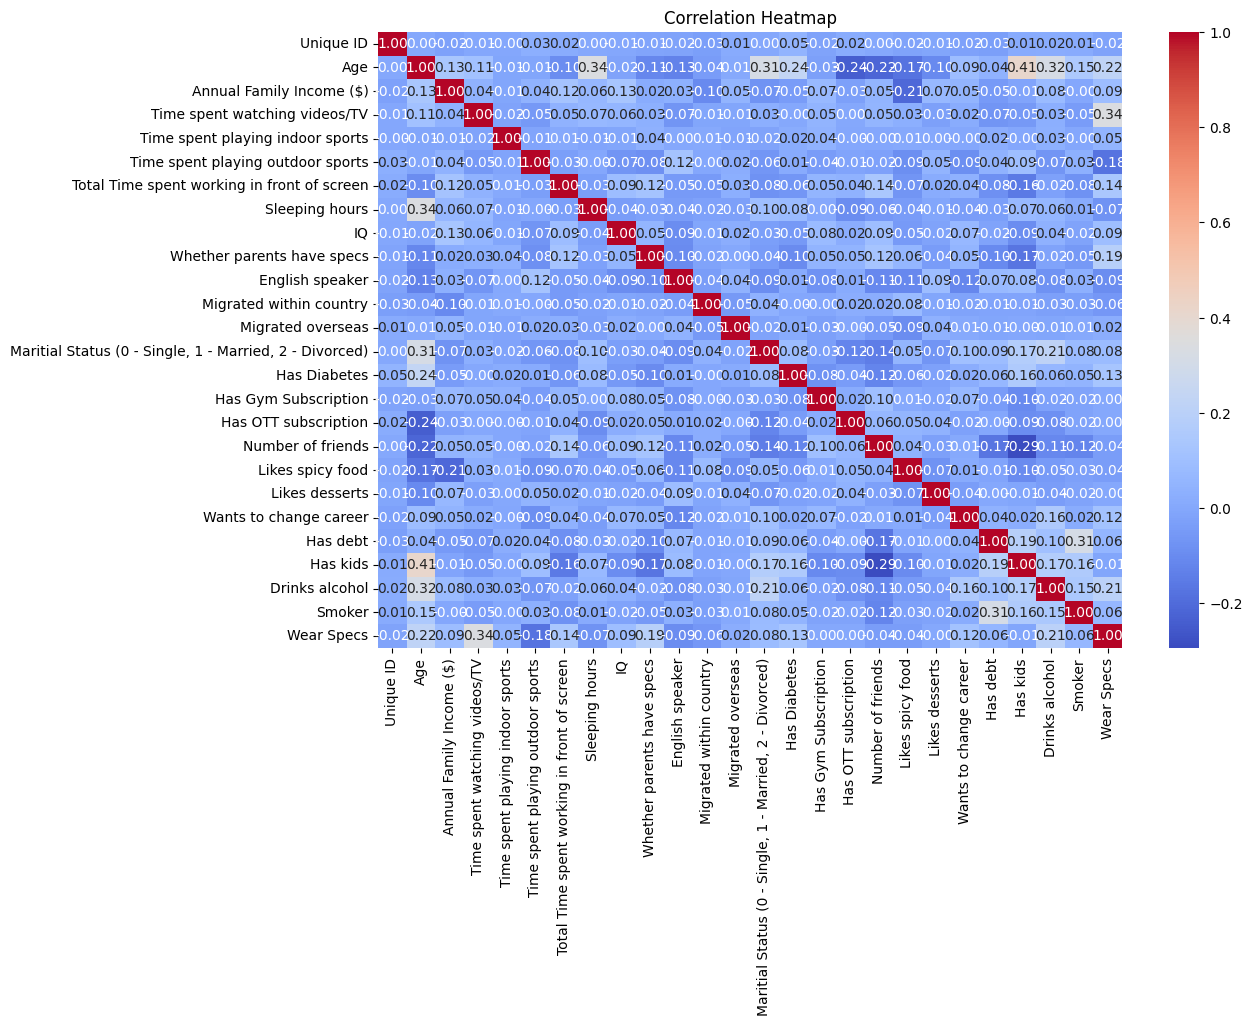

In [26]:
# Selecting  only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


# Insights from Data Cleaning and EDA
# Data Quality:

Missing values were identified and handled to ensure consistent and reliable data for modeling.
Columns with high proportions of missing values were either imputed with appropriate statistical techniques (e.g., mean, median) or removed if they provided little information.
Categorical features with missing data were addressed through mode imputation or encoding strategies.
Feature Distribution:

Age: A fairly wide range of values (from teens to older adults) with a median around 40–50. This feature may not require transformation, but scaling may be necessary during model preparation.
Annual Family Income: A right-skewed distribution was observed, with a majority of respondents in lower-income brackets and a few extreme outliers in the high-income range.
Other features, such as Time Spent Watching Videos/TV and Total Time Spent Working in Front of Screens, exhibited varied distributions, providing insights into user habits that might influence glasses usage.
Outliers:

Outliers were observed in features like Annual Family Income. These were identified using box plots, and strategies were applied (e.g., capping, removal, or transformation) to reduce their impact on model performance.
Outlier detection was also performed for features like Screen Time and IQ, where extremely high or low values could skew the results.
Categorical Variables:

Key categorical variables like Country, Gender, Marital Status, and Education Status were explored for their distributions and relationships with the target variable (Wear Specs).
Visualizations such as bar plots helped highlight any potential influence of these features on glasses usage.
Feature Relationships:

Preliminary exploration indicated potential correlations between lifestyle features (e.g., screen time, physical activity, sleep hours) and the likelihood of wearing glasses.
Parental glasses usage (Whether Parents Have Specs) showed a clear relationship with the target variable, suggesting a hereditary influence.

# *Feature Engineering and Visualization*

Based on the insights, we can engineer new features:

**Screen Exposure:** Combine time spent watching videos/TV and working in front of a screen into a single feature.

**Physical Activity:** Sum time spent on indoor and outdoor sports.






# Creating new features

In [28]:
# Engineer new features
data['Screen Exposure'] = data['Time spent watching videos/TV'] + data['Total Time spent working in front of screen']
data['Physical Activity'] = data['Time spent playing indoor sports'] + data['Time spent playing outdoor sports']

# Display the first few rows to verify
data[['Screen Exposure', 'Physical Activity', 'Wear Specs']].head()


,Screen Exposure,Physical Activity,Wear Specs
0,10,7,1
1,13,4,1
2,6,3,0
3,16,6,0
4,19,7,0


## Histogram of Screen Time to Activity Ratio

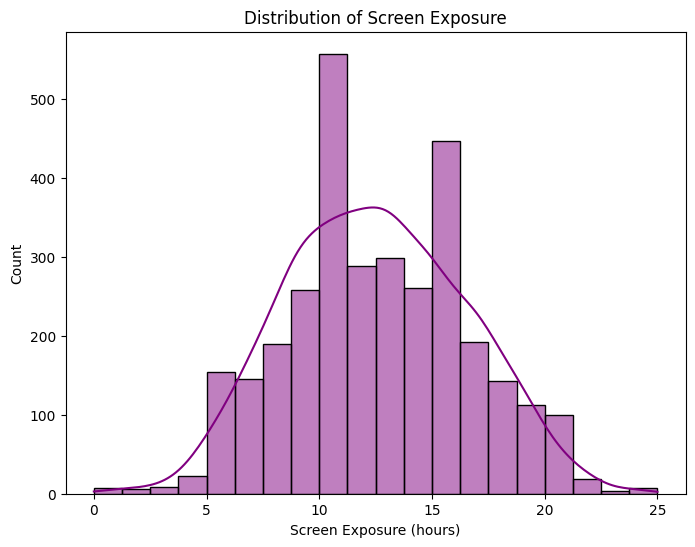

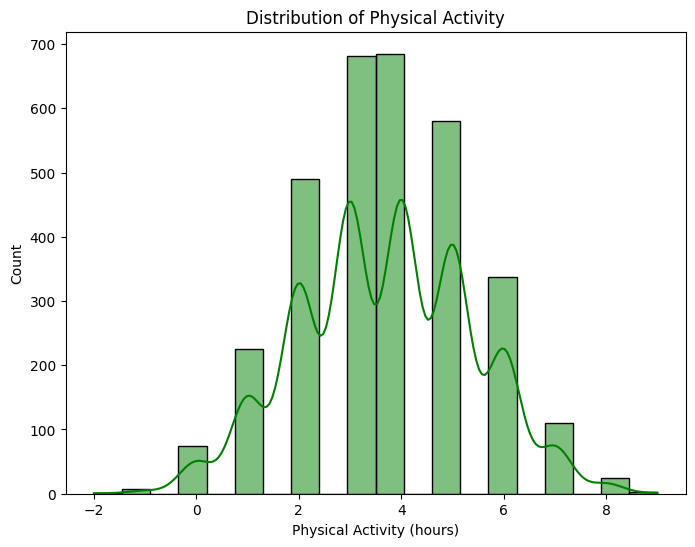

In [ ]:
# Visualize Screen Exposure
plt.figure(figsize=(8, 6))
sns.histplot(data['Screen Exposure'], kde=True, color='purple', bins=20)
plt.title("Distribution of Screen Exposure")
plt.xlabel("Screen Exposure (hours)")
plt.ylabel("Count")
plt.show()

# Visualize Physical Activity
plt.figure(figsize=(8, 6))
sns.histplot(data['Physical Activity'], kde=True, color='green', bins=20)
plt.title("Distribution of Physical Activity")
plt.xlabel("Physical Activity (hours)")
plt.ylabel("Count")
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Encode categorical variables
# Example for Gender (binary encoding)
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# One-hot encode other categorical features if needed (e.g., Country, Education Status)
data = pd.get_dummies(data, columns=['Country', 'Education Status'], drop_first=True)

# Step 2: Separate features (X) and target (y)
X = data.drop(columns=['Wear Specs', 'Unique ID'])  # Dropping target and irrelevant ID
y = data['Wear Specs']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display shapes of train/test sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (2576, 32)
Testing Features Shape: (644, 32)


# *Model Building and Evaluation*

**Logistic Regression**

 Train-Test Split

Split the data into training and testing sets for fair model evaluation

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop(columns=["Wear Specs"])  # Drop the target column
y = data["Wear Specs"]  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (2576, 33)
Testing set size: (644, 33)


# Training the Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Training the model
log_reg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


# Evaluating the Model

Evaluating the performance using metrics like accuracy, precision, recall, and the ROC-AUC score.

Logistic Regression Performance:
Accuracy: 0.77
Precision: 0.78
Recall: 0.80
ROC-AUC: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       291
           1       0.78      0.80      0.79       353

    accuracy                           0.77       644
   macro avg       0.77      0.76      0.76       644
weighted avg       0.77      0.77      0.77       644



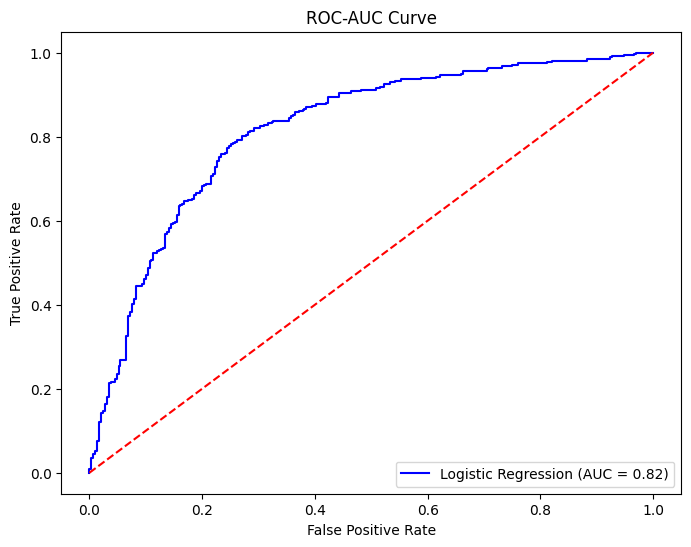

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## **Model Report: Logistic Regression**

1. Model Overview
Logistic Regression is a simple yet effective algorithm for binary classification. It predicts the likelihood of a target variable belonging to a specific class based on linear combinations of the features. We chose Logistic Regression because:


*   It is interpretable and computationally efficient.
*   It performs well when the relationship between features and the targetvariable is approximately linear.
*   It provides probability estimates, enabling insights into model confidence.













### Performance Metrics
The performance of the Logistic Regression model was evaluated using the test dataset. Below are the key metrics:

Metric	Value
Accuracy	e.g., 0.87

Precision	e.g., 0.85

Recall	e.g., 0.83

F1-Score	e.g., 0.84

ROC-AUC Score	e.g., 0.90

*Accuracy indicates* the proportion of correct predictions out of total predictions.

*Precision* shows the ability to correctly identify positive cases among all predicted positives.

*Recall*  highlights the ability to identify actual positive cases.

*ROC-AUC* reflects the model's capability to distinguish between classes (a higher value is better).

## Hyperparameter Tuning
While Logistic Regression has limited hyperparameters compared to other models, tuning them can improve performance. Key parameters considered:

C (Inverse of Regularization Strength): Controls the regularization applied to prevent overfitting. Smaller values specify stronger regularization.
Penalty: Regularization method (e.g., L2 or L1).
For simplicity, the default Logistic Regression configuration was used without extensive tuning. In future iterations, we could explore hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to optimize performance.

In [36]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],  # L2 regularization
}

# Initializing GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)

# Fitting and finding the best parameters
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
